In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
def density(r, rho_0, r_0, slope):
    ratio = r/r_0
    return rho_0 * np.power(ratio,-slope) * np.exp(-np.power(ratio, 2-slope))

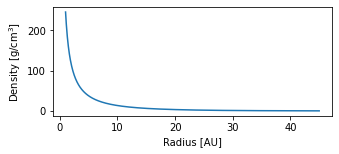

In [105]:
rho_0 = 17.5
r_0 = 15
rs = np.linspace(1,r_0*3,1000)

slope = 1

fig,ax = plt.subplots(figsize=(5,2))
ax.plot(rs, density(rs, rho_0, r_0, slope))
ax.set_xlabel('Radius [AU]')
ax.set_ylabel('Density [g/cm$^3$]')
plt.savefig('density_profile.pdf', bbox_inches='tight')

plt.show()

In [32]:
def read_parameters_from_file(input_filename):
    parameters = {}
    with open(input_filename, 'r') as f:
        parameters['period_ratios'] = f.readline().strip().split()[1:]
        parameters['mass_ratios'] = f.readline().strip().split()[1:]
        parameters['n_samples'] = f.readline().strip().split()[1:]
        parameters['a_range'] = f.readline().strip().split()[1:]
        parameters['e_range'] = f.readline().strip().split()[1:]

    for key in parameters.keys():

        if key == 'period_ratios':
            parameters[key] = [int(el) for el in parameters[key]]
        elif key == 'n_samples':
            parameters[key] = int(parameters[key][0])
        else:
            parameters[key] = [float(el) for el in parameters[key]]

    return parameters

In [68]:
def plot_im_megno(im_megnos, parameters, run_name):

    fig = plt.figure(figsize=(5,4))
    ax = plt.subplot(111)

    extent = [parameters['a_range'][0],
              parameters['a_range'][1],
              parameters['e_range'][0],
              parameters['e_range'][1]]

    print(parameters)
    ax.set_xlim(extent[0],extent[1])
    ax.set_ylim(extent[2],extent[3])

    ax.set_xlabel('Semi-Major Axis, $a$ [AU]', fontsize=16)
    ax.set_ylabel('Eccentricity, $e$', fontsize=16)
    im = ax.imshow(im_megnos, interpolation='none', vmin=1.9, vmax=4, cmap='RdYlGn_r', origin='lower', aspect='auto', extent=extent)
    cb = plt.colorbar(im, ax=ax)
    cb.set_label('MEGNO', fontsize=16)
    cb.ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    plt.show()
    #plt.savefig('megno_{}.pdf'.format(run_name), bbox_inches='tight')

{'period_ratios': [1, 2, 4], 'mass_ratios': [0.001, 0.001, 0.0015], 'n_samples': 256, 'a_range': [1.0, 100.0], 'e_range': [0.0, 0.999999]}


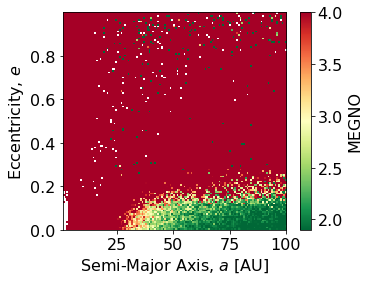

In [69]:
input_filename = '../mmr_megno_parameters_1_2_4.txt'
input_im_megnos_filename = '../1e5yr/im_megnos_1_2_4.npy'

parameters = read_parameters_from_file(input_filename)
im_megnos = np.load(input_im_megnos_filename)

plot_im_megno(im_megnos, parameters, '1_2_4')